# **Ada Boost**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_classes = 2,
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 1.2,
    random_state = 44
)

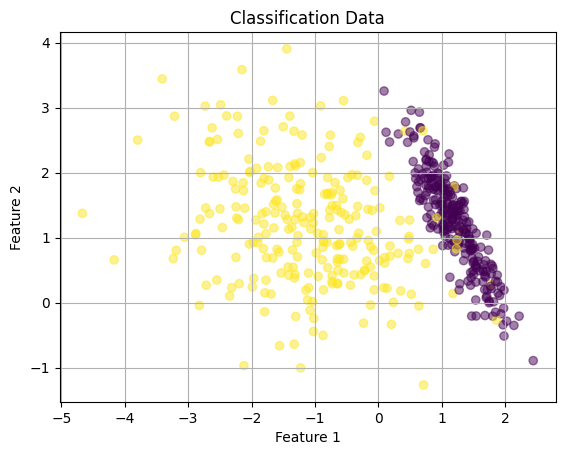

In [3]:
# plotting the data

plt.scatter(X[:, 0], X[:, 1], c=y, alpha = 0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Data')
plt.grid(True)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [5]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    random_state=44
)

In [6]:
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200, random_state=44)

In [7]:
from sklearn.metrics import f1_score


y_pred = ada.predict(x_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 score:", round(f1_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.94
F1 score: 0.9362

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.96      0.92      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



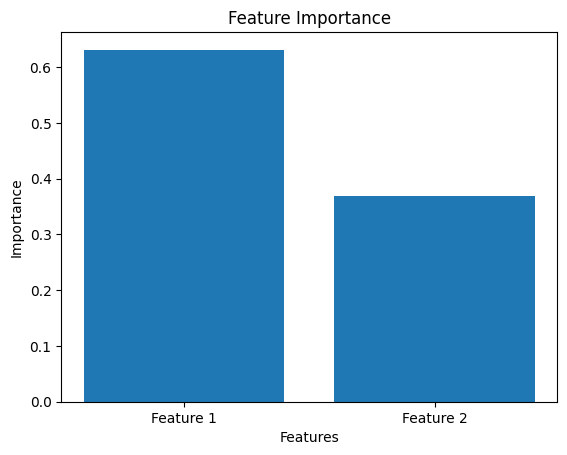

In [8]:
importances = ada.feature_importances_
plt.bar(range(len(importances)), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(importances)),['Feature 1', 'Feature 2'])
plt.title('Feature Importance')
plt.show()

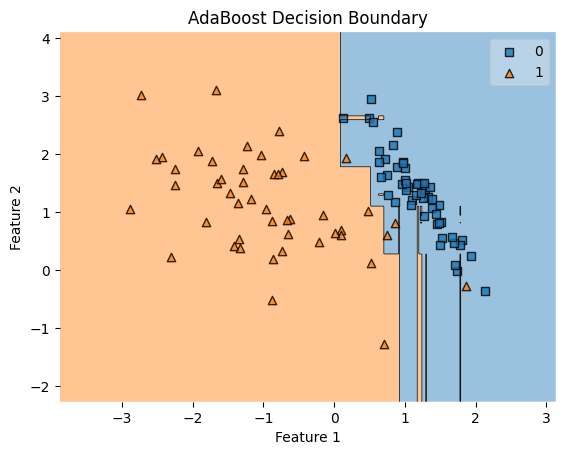

In [9]:
# visualizing the decision boundary

plot_decision_regions(X=x_test, y=y_test, clf=ada)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('AdaBoost Decision Boundary')
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1]
ada = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, param_grid=grid, n_jobs=-1, cv=8, scoring='f1')
grid_result = grid_search.fit(x_train, y_train)

In [11]:
print("Best hypreparameters:", grid_result.best_params_)
print("Best score:", grid_result.best_score_)

Best hypreparameters: {'learning_rate': 1, 'n_estimators': 100}
Best score: 0.9672226198171576


In [12]:
# using the best hyperparamete

ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1
)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [14]:
y_pred = ada.predict(x_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 score:", round(f1_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.94
F1 score: 0.9362

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.96      0.92      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



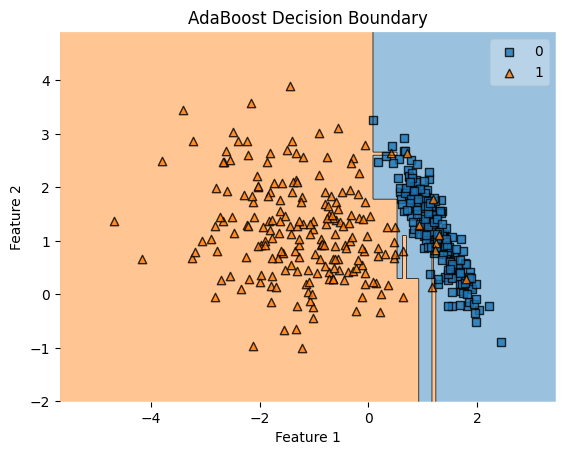

In [13]:
plot_decision_regions(X=x_train, y=y_train, clf=ada)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('AdaBoost Decision Boundary')
plt.show()